# **Importing and Installing Tools**



In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 3.8 MB/s 
     |████████████████████████████████| 16.6 MB 1.6 MB/s 
     |████████████████████████████████| 7.8 MB 5.6 MB/s 


In [ ]:
!pip install --upgrade pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 9.6 MB/s 
     |████████████████████████████████| 243 kB 50.7 MB/s 
     |████████████████████████████████| 41 kB 586 kB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 5.7 MB 48.9 MB/s 
     |████████████████████████████████| 116 kB 61.5 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 2.4 MB 52.6 MB/s 
     |████████████████████████████████| 60 kB 7.6 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 147 kB 58.3 MB/s 
     |████████████████████████████████| 179 kB 61.4 MB/s 
     |████████████████████████████████| 2.2 MB 43.8 MB/s 
     |████████████████████████████████| 183 kB 76.1 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 1.0 

In [ ]:
!pip install splot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install esda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing EDA and Plotting Libraries
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
# plots should appear in the notebook
%matplotlib inline 
import seaborn as sns

# Visualization themes & styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Statistical Analysis Libraries
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.formula.api as sm
import statsmodels.api as sm

# Importing Spatial Analysis Libraries
import geopandas as gpd
from pysal.model import spreg
from pysal.lib import weights
import splot
from esda.moran import Moran, Moran_Local
import esda
import libpysal as lps
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

# Regression Models for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connect Google Drive to Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Imports - NDVI Data**

In [ ]:
# Import Dissemination Area Boundary Data
peel_da_boundaries = gpd.read_file('/content/drive/MyDrive/GGR442_Project3_Data/2016_Census_DA.geojson')
peel_da_boundaries.head(10)

,OBJECTID,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,...,Mobility5_Movers,Mobility5_Non_migrants,Mobility5_Migrants,Mobility5_Internal_migrants,Mobility5_Intraprovincial_migra,Mobility5_Interprovincial_migra,Mobility5_External_migrants,SHAPE_Length,SHAPE_Area,geometry
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,315.0,105.0,210.0,210.0,210.0,0.0,0.0,0.202727,0.001740,"MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ..."
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,230.0,110.0,115.0,115.0,105.0,10.0,0.0,0.253848,0.003098,"MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ..."
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,205.0,45.0,155.0,155.0,145.0,10.0,0.0,0.152793,0.001292,"MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ..."
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,115.0,45.0,70.0,60.0,55.0,10.0,15.0,0.171581,0.001747,"MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ..."
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,205.0,55.0,150.0,145.0,140.0,10.0,0.0,0.211042,0.002237,"MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ..."
5,4095,35211615,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,255.0,55.0,200.0,200.0,205.0,0.0,10.0,0.275134,0.003125,"MULTIPOLYGON (((-79.91559 43.80088, -79.91566 ..."
6,4096,35211616,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,85.0,35.0,50.0,45.0,45.0,0.0,10.0,0.302833,0.002844,"MULTIPOLYGON (((-79.92523 43.86091, -79.92387 ..."
7,4097,35211617,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,130.0,10.0,125.0,125.0,125.0,0.0,0.0,0.112284,0.000470,"MULTIPOLYGON (((-79.97298 43.86101, -79.97063 ..."
8,4098,35211618,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,100.0,0.0,95.0,95.0,100.0,0.0,0.0,0.096395,0.000463,"MULTIPOLYGON (((-79.99101 43.86462, -79.99201 ..."
9,4099,35211619,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,85.0,10.0,75.0,75.0,75.0,0.0,0.0,0.096173,0.000476,"MULTIPOLYGON (((-80.00640 43.85145, -80.00704 ..."


In [ ]:
# Description of Peel DA Boundaries 
print(peel_da_boundaries.shape)
peel_da_boundaries.dtypes

(1650, 314)


OBJECTID                              int64
DAUID                                object
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

In [ ]:
peel_da_boundaries['DAUID'] = pd.to_numeric(peel_da_boundaries['DAUID'])
peel_da_boundaries.dtypes

OBJECTID                              int64
DAUID                                 int64
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

In [ ]:
# Import 2011 NDVI Data
ndvi_2011_data_df = pd.read_csv('/content/drive/MyDrive/GEE output/landsat7_ndvi_Peel_2011.csv')
ndvi_2011_data_df.head(10)

# Drop the useless geometry column
ndvi_2011_data_df = ndvi_2011_data_df.drop(['.geo', 'system:index'], axis = 1)
ndvi_2011_data_df.head(5)

,APMean,APMean_1,Area_km2,CCSNAME,CCSNAME_1,CCSUID,CCSUID_1,CCSUID_12,CDNAME,CDNAME_1,...,SACCODE,SACCODE_1,SACTYPE,SACTYPE_1,SHAPE_Leng,Shape_Area,Shape_Le_1,geometry,geometry_1,mean
0,0.0,0.0,695.993029,East Garafraxa,NaN,3522001,0,0,Dufferin,NaN,...,996,0,4,0,151323.106534,4107.251097,4218.519489,NaN,NaN,0.346658
1,0.0,0.0,695.993029,Adjala-Tosorontio,NaN,3543003,0,0,Simcoe,NaN,...,996,0,4,0,151323.106534,13696.846859,1980.461648,NaN,NaN,0.291757
2,0.0,0.0,695.993029,Erin,NaN,3523017,0,0,Wellington,NaN,...,996,0,4,0,151323.106534,6718.674617,4856.251558,NaN,NaN,0.356778
3,0.0,0.0,695.993029,Erin,NaN,3523017,0,0,Wellington,NaN,...,996,0,4,0,151323.106534,3745.502785,1017.459579,NaN,NaN,0.326932
4,0.0,0.0,695.993029,Erin,NaN,3523017,0,0,Wellington,NaN,...,996,0,4,0,151323.106534,33480.103590,26273.718630,NaN,NaN,0.305478


In [ ]:
# Description of Peel 2011 NDVI Data
print(ndvi_2011_data_df.shape)
ndvi_2011_data_df.dtypes

(1712, 65)


APMean        float64
APMean_1      float64
Area_km2      float64
CCSNAME        object
CCSNAME_1      object
               ...   
Shape_Area    float64
Shape_Le_1    float64
geometry      float64
geometry_1    float64
mean          float64
Length: 65, dtype: object

In [ ]:
# Merge Peel Boundary Files to 2011 NDVI Air Pollution
peel_ndvi_2011_df = peel_da_boundaries.merge(ndvi_2011_data_df, on = 'DAUID')
peel_ndvi_2011_df

,OBJECTID_x,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,SACCODE_y,SACCODE_1,SACTYPE_y,SACTYPE_1,SHAPE_Leng,Shape_Area,Shape_Le_1,geometry_y,geometry_1,mean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,535,1,1,151323.106534,2.994879e+07,25565.778150,NaN,NaN,0.315168
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,535,1,1,151323.106534,5.330538e+07,32167.259791,NaN,NaN,0.362969
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,535,1,1,151323.106534,2.217722e+07,19780.911771,NaN,NaN,0.317872
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,535,1,1,151323.106534,2.977591e+07,35984.738918,NaN,NaN,0.329838
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,535,1,1,151323.106534,3.819210e+07,39354.689514,NaN,NaN,0.364633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,8854,35212107,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,535,1,1,139183.481405,2.127211e+06,10830.479415,NaN,NaN,0.342815
1638,8855,35212118,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,535,1,1,139183.481405,1.615819e+06,6478.859336,NaN,NaN,0.149845
1639,8856,35212119,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,535,1,1,139183.481405,1.480887e+06,8945.330485,NaN,NaN,0.156251
1640,8869,35212082,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,535,1,1,139183.481405,6.159697e+04,1354.618389,NaN,NaN,0.158178


# **Data Exploration and Visualizations - NDVI Data**

In [ ]:
# Summary Statistics of NDVI in 2011 for Peel Region
peel_ndvi_2011_df['mean'].describe()

count    1636.000000
mean        0.207583
std         0.050117
min         0.085595
25%         0.172542
50%         0.198097
75%         0.233500
max         0.413547
Name: mean, dtype: float64

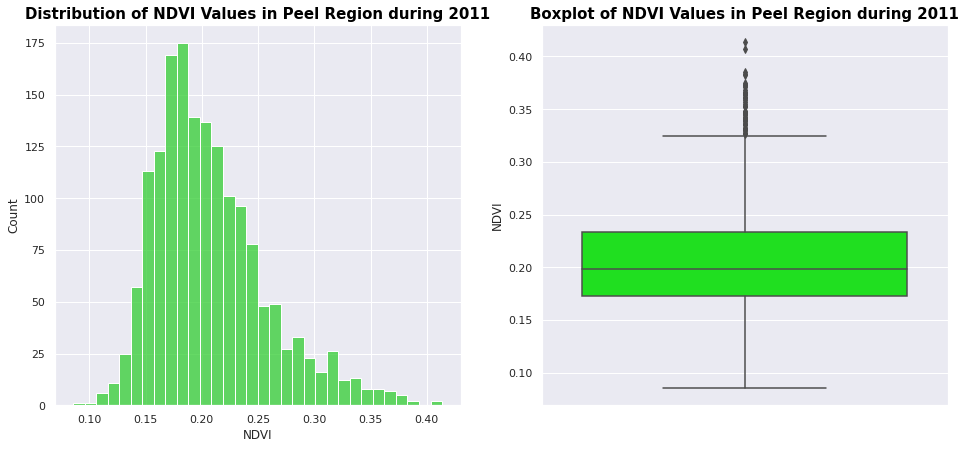

In [ ]:
# Histogram and Box Plots of NDVI in 2011 for Peel Region
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (16, 7))

# Histogram for 2011 NDVI 
sns.histplot(ax = ax1, data = peel_ndvi_2011_df, x = 'mean', color = 'limegreen')
ax1.set_title('Distribution of NDVI Values in Peel Region during 2011', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("NDVI")
ax1.set_ylabel("Count");

# Boxplot for 2011 NDVI 
sns.boxplot(ax = ax2, y = peel_ndvi_2011_df['mean'], color = 'lime')
ax2.set_title('Boxplot of NDVI Values in Peel Region during 2011', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("NDVI");

In [ ]:
# Computing Skewness and Kurtosis of NDVI variable
print("The Skewness of the NDVI Values in 2011 for Peel Region: " + str(peel_ndvi_2011_df['mean'].skew()))
print("The kurtosis of the NDVI Values in 2011 for Peel Region: " + str(peel_ndvi_2011_df['mean'].kurt()))

The Skewness of the NDVI Values in 2011 for Peel Region: 0.9868025051546235
The kurtosis of the NDVI Values in 2011 for Peel Region: 1.006858006330848


# **Data Imports - NO$_{2}$ Data**

In [ ]:
# Import 2011 NO2 Data
no2_2011_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/AP_11.csv')
no2_2011_data_df.head(10)

# Drop the useless geometry column
no2_2011_data_df = no2_2011_data_df.drop('geometry', axis = 1)
no2_2011_data_df.head(5)

,DAUID,CDUID,CDNAME,CDTYPE,CSDUID,CSDNAME,CSDTYPE,CCSUID,CCSNAME,ERUID,...,CMAUID,CMANAME,CMATYPE,SACCODE,SACTYPE,CTUID,CTNAME,PRUID,PRNAME,APMean
0,35210167,3521,Peel,RM,3521010,Brampton,CY,3521010,Brampton,3530,...,535,Toronto,B,535,1,5350575.01,575.01,35,Ontario,11.468890
1,35210121,3521,Peel,RM,3521010,Brampton,CY,3521010,Brampton,3530,...,535,Toronto,B,535,1,5350564.01,564.01,35,Ontario,13.360573
2,35210456,3521,Peel,RM,3521005,Mississauga,CY,3521005,Mississauga,3530,...,535,Toronto,B,535,1,5350516.09,516.09,35,Ontario,15.225655
3,35211089,3521,Peel,RM,3521005,Mississauga,CY,3521005,Mississauga,3530,...,535,Toronto,B,535,1,5350529.01,529.01,35,Ontario,14.057582
4,35211967,3521,Peel,RM,3521005,Mississauga,CY,3521005,Mississauga,3530,...,535,Toronto,B,535,1,5350516.42,516.42,35,Ontario,10.000008


In [ ]:
# Description of Peel 2011 NO2 Data
print(no2_2011_data_df.shape)
no2_2011_data_df.dtypes

(1626, 22)


DAUID        int64
CDUID        int64
CDNAME      object
CDTYPE      object
CSDUID       int64
CSDNAME     object
CSDTYPE     object
CCSUID       int64
CCSNAME     object
ERUID        int64
ERNAME      object
CMAPUID      int64
CMAUID       int64
CMANAME     object
CMATYPE     object
SACCODE      int64
SACTYPE      int64
CTUID      float64
CTNAME     float64
PRUID        int64
PRNAME      object
APMean     float64
dtype: object

In [ ]:
# Merge Peel Boundary Files to 2011 NO2 Air Pollution
peel_no2_2011_df = peel_da_boundaries.merge(no2_2011_data_df, on = 'DAUID')
peel_no2_2011_df

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMAUID_y,CMANAME_y,CMATYPE_y,SACCODE_y,SACTYPE_y,CTUID_y,CTNAME_y,PRUID_y,PRNAME_y,APMean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,Toronto,B,535,1,5350585.07,585.07,35,Ontario,4.499027
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,Toronto,B,535,1,5350585.07,585.07,35,Ontario,4.398460
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,Toronto,B,535,1,5350586.01,586.01,35,Ontario,5.642140
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,Toronto,B,535,1,5350586.02,586.02,35,Ontario,5.708934
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,Toronto,B,535,1,5350586.02,586.02,35,Ontario,5.751850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,8854,35212107,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,Toronto,B,535,1,5350501.02,501.02,35,Ontario,11.621174
1606,8855,35212118,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,Toronto,B,535,1,5350525.02,525.02,35,Ontario,18.087823
1607,8856,35212119,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,Toronto,B,535,1,5350525.02,525.02,35,Ontario,18.205494
1608,8869,35212082,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,Toronto,B,535,1,5350526.02,526.02,35,Ontario,15.246634


In [ ]:
# Ensure that geometry is retained with 2011 NO2 Data
peel_no2_2011_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1605    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1606    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1607    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1608    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1609    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1610, dtype: geometry

# **Data Exploration and Visualizations - NO$_{2}$ Data**

In [ ]:
# Summary Statistics of NO2 in 2011 for Peel Region
peel_no2_2011_df['APMean'].describe()

count    1610.000000
mean       12.399046
std         2.719749
min         4.236405
25%        11.057554
50%        12.599671
75%        14.081434
max        21.656810
Name: APMean, dtype: float64

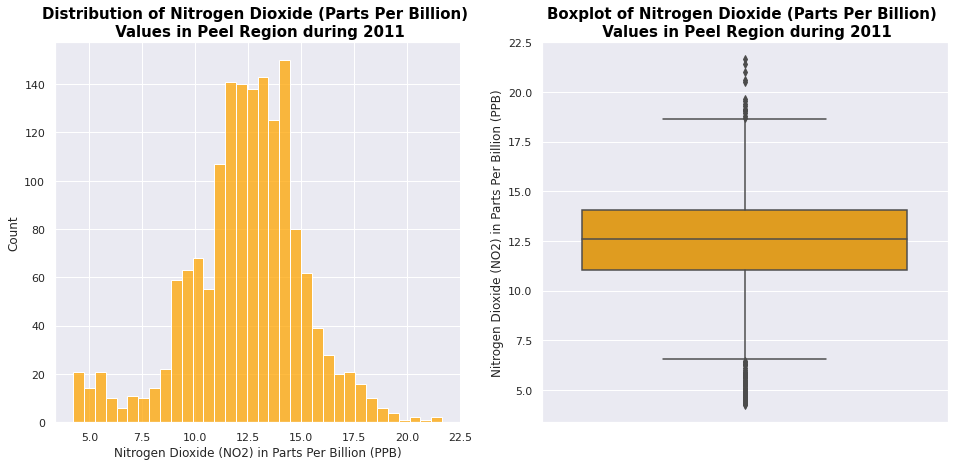

In [ ]:
# Histogram and Box Plots of NO2 in 2011 for Peel Region
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (16, 7))

# Histogram for 2011 NO2
sns.histplot(ax = ax1, data = peel_no2_2011_df, x = 'APMean', color = 'orange')
ax1.set_title('Distribution of Nitrogen Dioxide (Parts Per Billion) \n Values in Peel Region during 2011', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("Nitrogen Dioxide (NO2) in Parts Per Billion (PPB)")
ax1.set_ylabel("Count");

# Boxplot for 2011 NO2
sns.boxplot(ax = ax2, y = peel_no2_2011_df['APMean'], color = 'orange')
ax2.set_title('Boxplot of Nitrogen Dioxide (Parts Per Billion) \n Values in Peel Region during 2011', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("Nitrogen Dioxide (NO2) in Parts Per Billion (PPB)");

In [ ]:
# Computing Skewness and Kurtosis of Nitrogen Dioxide variable
print("The Skewness of the Nitrogen Dioxide Values in 2011 for Peel Region: " + str(peel_no2_2011_df['APMean'].skew()))
print("The kurtosis of the Nitrogen Dioxide Values in 2011 for Peel Region: " + str(peel_no2_2011_df['APMean'].kurt()))

# **Data Merging - Merging NO$_{2}$ and NDVI Data**

In [ ]:
# Merge 2011 Pollutant and NDVI Data
peel_ndvi_2011_relevant_info_df = peel_ndvi_2011_df[['DAUID', 'mean']]
peel_ndvi_2011_relevant_info_df.head(5)
peel_2011_df = peel_no2_2011_df.merge(peel_ndvi_2011_relevant_info_df, on = 'DAUID')
peel_2011_df.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMANAME_y,CMATYPE_y,SACCODE_y,SACTYPE_y,CTUID_y,CTNAME_y,PRUID_y,PRNAME_y,APMean,mean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350585.07,585.07,35,Ontario,4.499027,0.315168
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350585.07,585.07,35,Ontario,4.398460,0.362969
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350586.01,586.01,35,Ontario,5.642140,0.317872
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350586.02,586.02,35,Ontario,5.708934,0.329838
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350586.02,586.02,35,Ontario,5.751850,0.364633


In [ ]:
# Inspect Accuracy of Merge
peel_2011_df[peel_2011_df['DAUID'] == 35212104]

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMANAME_y,CMATYPE_y,SACCODE_y,SACTYPE_y,CTUID_y,CTNAME_y,PRUID_y,PRNAME_y,APMean,mean
773,6590,35212104,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,...,Toronto,B,535,1,5350572.09,572.09,35,Ontario,11.736098,0.262922


In [ ]:
peel_2011_df.dropna()

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMANAME_y,CMATYPE_y,SACCODE_y,SACTYPE_y,CTUID_y,CTNAME_y,PRUID_y,PRNAME_y,APMean,mean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350585.07,585.07,35,Ontario,4.499027,0.315168
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350585.07,585.07,35,Ontario,4.398460,0.362969
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350586.01,586.01,35,Ontario,5.642140,0.317872
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350586.02,586.02,35,Ontario,5.708934,0.329838
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,B,535,1,5350586.02,586.02,35,Ontario,5.751850,0.364633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,8854,35212107,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,B,535,1,5350501.02,501.02,35,Ontario,11.621174,0.342815
1638,8855,35212118,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,B,535,1,5350525.02,525.02,35,Ontario,18.087823,0.149845
1639,8856,35212119,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,B,535,1,5350525.02,525.02,35,Ontario,18.205494,0.156251
1640,8869,35212082,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,B,535,1,5350526.02,526.02,35,Ontario,15.246634,0.158178


In [ ]:
# Explore 2011 NDVI Data
peel_2011_df['mean'].describe()

count    1636.000000
mean        0.207583
std         0.050117
min         0.085595
25%         0.172542
50%         0.198097
75%         0.233500
max         0.413547
Name: mean, dtype: float64

In [ ]:
# Explore 2011 Nitrogen Dioxide Data
peel_2011_df['APMean'].describe()

count    1642.000000
mean       12.380012
std         2.754558
min         4.236405
25%        11.000000
50%        12.588721
75%        14.081434
max        21.656810
Name: APMean, dtype: float64

In [ ]:
# Handle Missing Values
peel_2011_df['mean'].replace('', np.nan, inplace=True)
peel_2011_df.dropna(subset=['mean'], inplace=True)

In [ ]:
# Inspected Explore 2011 NDVI Data
peel_2011_df['mean'].describe()

count    1636.000000
mean        0.207583
std         0.050117
min         0.085595
25%         0.172542
50%         0.198097
75%         0.233500
max         0.413547
Name: mean, dtype: float64

In [ ]:
# Inspect Cleaned 2011 Nitrogen Dioxide Data
peel_2011_df['APMean'].describe()

count    1636.000000
mean       12.392926
std         2.751108
min         4.236405
25%        11.021995
50%        12.599065
75%        14.086405
max        21.656810
Name: APMean, dtype: float64

# **Correlation Analysis**

In [ ]:
# Pearson's Correlation Test for 2011 NDVI and 2011 NO2
stat, p = pearsonr(peel_2011_df['mean'], peel_2011_df['APMean'])
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=-0.2703268247, p=0.0000000000
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


# **Data Preprocessing for Linear Modeling**

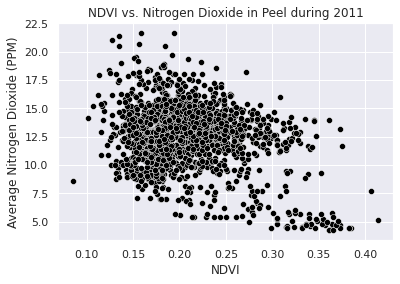

In [ ]:
# Scatter Plot of NDVI vs. Nitrogen Dioxide in Peel during 2011
ax = sns.scatterplot(data = peel_2011_df, x = 'mean', y = 'APMean', color = 'black');
plt.xlabel("NDVI")
plt.ylabel("Average Nitrogen Dioxide (PPM)")
plt.title("NDVI vs. Nitrogen Dioxide in Peel during 2011") 
plt.show();

In [ ]:
# Split Data into X (predictor) and y (target)
X = peel_2011_df['mean']
y = peel_2011_df['APMean']

# **Linear Modeling**

In [ ]:
# Acquire Linear Regression Model Accuracy with NumPy
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.073077


In [ ]:
# OLS Linear Model with 2011 Data
baseline_sp_ols_reg = spreg.OLS(peel_2011_df[['APMean']].values, peel_2011_df[['mean']].values)
print(baseline_sp_ols_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1636
Mean dependent var  :     12.3929                Number of Variables   :           2
S.D. dependent var  :      2.7511                Degrees of Freedom    :        1634
R-squared           :      0.0731
Adjusted R-squared  :      0.0725
Sum squared residual:   11470.356                F-statistic           :    128.8209
Sigma-square        :       7.020                Prob(F-statistic)     :   8.608e-29
S.E. of regression  :       2.649                Log likelihood        :   -3914.448
Sigma-square ML     :       7.011                Akaike info criterion :    7832.896
S.E of regression ML:      2.6479                Schwarz criterion     :    7843.696

-----------------------------------------------------------------------------

# **Data Preprocessing for Linear Modeling with Log-Transformed Data**

In [ ]:
# Log Transforming Skewed NDVI Values
peel_2011_df["log_ndvi"] = np.log(peel_2011_df["mean"] + 0.000001)
peel_2011_df['log_ndvi']

0      -1.154645
1      -1.013435
2      -1.146102
3      -1.109151
4      -1.008862
          ...   
1637   -1.070561
1638   -1.898145
1639   -1.856285
1640   -1.844029
1641   -1.942924
Name: log_ndvi, Length: 1636, dtype: float64

In [ ]:
# Split the data into X and y
X = peel_2011_df['log_ndvi']

y = peel_2011_df['APMean']

# **Linear Modeling with Log-Transformed Data**

In [ ]:
# Acquire Linear Regression Model Accuracy with NumPy on Log-Transformed Data
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.054429


In [ ]:
# OLS Linear Model with 2011 Data
baseline_sp_ols_reg = spreg.OLS(peel_2011_df[['APMean']].values, peel_2011_df[['log_ndvi']].values)
print(baseline_sp_ols_reg.summary) 

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1636
Mean dependent var  :     12.3929                Number of Variables   :           2
S.D. dependent var  :      2.7511                Degrees of Freedom    :        1634
R-squared           :      0.0544
Adjusted R-squared  :      0.0539
Sum squared residual:   11701.113                F-statistic           :     94.0565
Sigma-square        :       7.161                Prob(F-statistic)     :   1.161e-21
S.E. of regression  :       2.676                Log likelihood        :   -3930.741
Sigma-square ML     :       7.152                Akaike info criterion :    7865.482
S.E of regression ML:      2.6744                Schwarz criterion     :    7876.282

-----------------------------------------------------------------------------

Worsened Performance LOL great suggestion made.

# **Spatial Autocorrelation of NO$_{2}$ - Moran's I**

In [ ]:
# Spatial Weights
wq = lps.weights.KNN.from_dataframe(peel_2011_df, k=5)

# Row-Standardization
wq.transform = 'r'

# Spatial Lag of Nitrogen Dioxide Data
peel_2011_df['APMean'] = lps.weights.lag_spatial(wq, peel_2011_df['APMean'])

# Moran's I
y = peel_2011_df.APMean
moran = Moran(y, wq)
moran.I

0.9704088307770992

# **Spatial Regression Modeling - Spatially Lagged Regression**

In [ ]:
# Create weights
w_ndvi = weights.KNN.from_dataframe(peel_2011_df, k = 5)

# Assign spatial lag based on the pool values
lagged = peel_2011_df.assign(w_ndvi = weights.spatial_lag.lag_spatial(w_ndvi, peel_2011_df['mean'].values))
lagged.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,SACCODE_y,SACTYPE_y,CTUID_y,CTNAME_y,PRUID_y,PRNAME_y,APMean,mean,log_ndvi,w_ndvi
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,5350585.07,585.07,35,Ontario,4.541321,0.315168,-1.154645,1.646629
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,5350585.07,585.07,35,Ontario,4.549732,0.362969,-1.013435,1.785204
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,5350586.01,586.01,35,Ontario,5.663711,0.317872,-1.146102,1.614109
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,5350586.02,586.02,35,Ontario,6.269249,0.329838,-1.109151,1.610555
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,5350586.02,586.02,35,Ontario,5.720605,0.364633,-1.008862,1.787922


In [ ]:
# Spatially Lagged Regression Model
sp_lag_reg = spreg.OLS(lagged[['APMean']].values, lagged[['w_ndvi']].values)
print(sp_lag_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1636
Mean dependent var  :     12.3319                Number of Variables   :           2
S.D. dependent var  :      2.5745                Degrees of Freedom    :        1634
R-squared           :      0.0773
Adjusted R-squared  :      0.0768
Sum squared residual:    9999.138                F-statistic           :    136.9643
Sigma-square        :       6.119                Prob(F-statistic)     :   1.938e-30
S.E. of regression  :       2.474                Log likelihood        :   -3802.164
Sigma-square ML     :       6.112                Akaike info criterion :    7608.327
S.E of regression ML:      2.4722                Schwarz criterion     :    7619.127

-----------------------------------------------------------------------------

# **Machine Learning**

In [ ]:
# Split the data into X and y
X = peel_2011_df['mean']

y = peel_2011_df['APMean']

In [ ]:
# Set random seed for consistency and reproducibility
np.random.seed(42)

# Split data into train & sets
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
# Sizes of test & training sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is: (1308,)
The shape of X_test is:  (328,)
The shape of y_train is: (1308,)
The shape of y_test is:  (328,)


In [ ]:
# Converting Predictor and Target into NumPy Arrays for Scikit-Learn
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Reshaping NumPy Arrays to Train and Test Models in Scikit-Learn (Only 1 Predictor)
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# Models
models = {"Lasso": Lasso(),
          "Elastic Net": ElasticNet(),
          "KNN Regressor": KNeighborsRegressor(),
          "SVR": SVR(),
          "Gradient Boost": GradientBoostingRegressor(),
          "Random Forest": RandomForestRegressor(),}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning mdoels.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    # Random seed for consistent and reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
# Obtain scores for models
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Lasso': -0.0014724727678763205,
 'Elastic Net': -0.0014724727678763205,
 'KNN Regressor': -0.022182859715073944,
 'SVR': 0.08160527756870128,
 'Gradient Boost': 0.06562125928310258,
 'Random Forest': -0.29221279403677647}

In [ ]:
# Put models into dataframe for comparison
model_compare = pd.DataFrame(model_scores, index = ["R^2"])
model_compare

,Lasso,Elastic Net,KNN Regressor,SVR,Gradient Boost,Random Forest
R^2,-0.001472,-0.001472,-0.022183,0.081605,0.065621,-0.292213


                                                      Model Comparison:                                                      
                                               _______________________________                                               


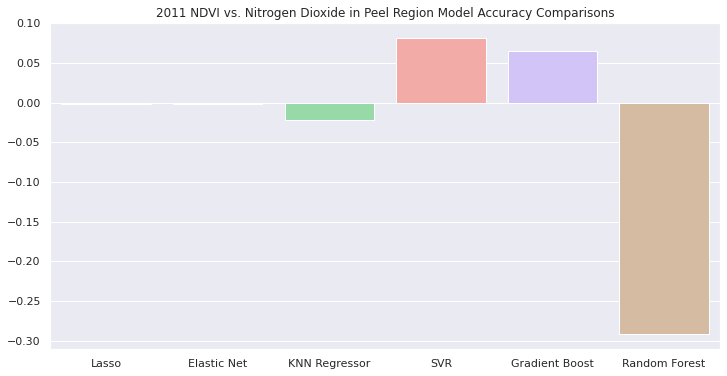

In [ ]:
# Visualize model results
# Title for Model Comparison Bar Plot
title_graph = "Model Comparison:"
centered_title = title_graph.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plot model results
plt.figure(figsize = (12, 6))
model_compare_plot = sns.barplot(data = model_compare)
plt.title('2011 NDVI vs. Nitrogen Dioxide in Peel Region Model Accuracy Comparisons');